In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

 * ****1. Exploratory Data Analysis and Data Understanding****

 **Selecting and Loading a Dataset Aligned with UNSDG Using Pandas**




In [77]:
df = pd.read_csv('/content/drive/MyDrive/final_dataset/enhanced_health_data.csv')

**Perform an initial analysis to gather a detailed description of the dataset.**

**1.**   **When and by whom created the dataset?**

  **Answer**: Abhay Ayare created the dataset on July 22, 2024.

**2.** **How did you access to the dataset?**

   **Answer**: I accessed to the dataset by downloading it through a website named Kaggle.

**3.** **How does it align with the chosen UNSDG?**

  **Answer**: The dataset contains health metrics such as blood pressure, cholesterol levels, BMI, and diabetes status. This aligns with UNSDG Goal 3: Good Health and Well-being, which aims to ensure healthy lives and promote well-being for all. The dataset can be used to analyze health trends, identify risk factors, and support healthcare decision-making.

**4.** **List all the attributes (columns) present in the dataset.**

  **Answer**: The attributes (columns) present in a dataset are:

In [78]:
#attributes (columns) of a datset
df.columns

Index(['Name', 'Gender', 'Age', 'Systolic BP', 'Diastolic BP', 'Cholesterol',
       'Height (cm)', 'Weight (kg)', 'BMI', 'Smoker', 'Diabetes', 'Health'],
      dtype='object')

In [79]:
#Identify the number of rows and columns in the dataset.
row=len(df.index)
print(f"no of row = {row}.")
columns=len(df.columns)
print(f"no of columns = {columns}.")

no of row = 1000.
no of columns = 12.


In [80]:
print("All the columns and their data types :- ")
print(df.dtypes)

All the columns and their data types :- 
Name             object
Gender           object
Age               int64
Systolic BP       int64
Diastolic BP      int64
Cholesterol       int64
Height (cm)     float64
Weight (kg)     float64
BMI             float64
Smoker             bool
Diabetes           bool
Health           object
dtype: object


**Assessing Dataset Suitability for Analysis**

In [81]:
df.head()

,Name,Gender,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI,Smoker,Diabetes,Health
0,Heidi Williamson,Male,35,129,83,188,169.072096,73.796178,25.816062,False,True,Fair
1,Eric Odom,Male,70,133,95,224,154.188610,70.671522,29.726232,False,False,Fair
2,Kelly Thomas,Male,79,149,88,179,197.514897,97.590268,25.015362,True,True,Bad
3,Ann Lara,Female,52,115,76,204,157.223771,82.202776,33.254473,False,False,Fair
4,Tammy Oliver,Male,51,135,82,201,177.370258,57.038726,18.130435,False,False,Fair


In [82]:
df.describe()

,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.834000,129.526000,82.879000,187.715000,175.038446,74.941397,24.919168
std,17.980816,9.532061,6.064911,21.091387,14.395461,14.622998,6.290984
min,18.000000,105.000000,65.000000,140.000000,150.087644,50.011915,13.094723
25%,33.000000,123.000000,80.000000,172.000000,162.805812,62.264152,20.162104
50%,49.000000,130.000000,83.000000,187.000000,175.426060,74.808034,24.164326
75%,64.000000,136.000000,87.000000,203.000000,187.827352,87.518363,28.671465
max,80.000000,150.000000,95.000000,239.000000,199.966307,99.954932,43.806649


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1000 non-null   object 
 1   Gender        1000 non-null   object 
 2   Age           1000 non-null   int64  
 3   Systolic BP   1000 non-null   int64  
 4   Diastolic BP  1000 non-null   int64  
 5   Cholesterol   1000 non-null   int64  
 6   Height (cm)   1000 non-null   float64
 7   Weight (kg)   1000 non-null   float64
 8   BMI           1000 non-null   float64
 9   Smoker        1000 non-null   bool   
 10  Diabetes      1000 non-null   bool   
 11  Health        1000 non-null   object 
dtypes: bool(2), float64(3), int64(4), object(3)
memory usage: 80.2+ KB


Data Cleaning

In [84]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Print some info
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1000 non-null   object 
 1   Gender        1000 non-null   object 
 2   Age           1000 non-null   int64  
 3   Systolic BP   1000 non-null   int64  
 4   Diastolic BP  1000 non-null   int64  
 5   Cholesterol   1000 non-null   int64  
 6   Height (cm)   1000 non-null   float64
 7   Weight (kg)   1000 non-null   float64
 8   BMI           1000 non-null   float64
 9   Smoker        1000 non-null   bool   
 10  Diabetes      1000 non-null   bool   
 11  Health        1000 non-null   object 
dtypes: bool(2), float64(3), int64(4), object(3)
memory usage: 80.2+ KB


,Name,Gender,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI,Smoker,Diabetes,Health
0,Heidi Williamson,Male,35,129,83,188,169.072096,73.796178,25.816062,False,True,Fair
1,Eric Odom,Male,70,133,95,224,154.188610,70.671522,29.726232,False,False,Fair
2,Kelly Thomas,Male,79,149,88,179,197.514897,97.590268,25.015362,True,True,Bad
3,Ann Lara,Female,52,115,76,204,157.223771,82.202776,33.254473,False,False,Fair
4,Tammy Oliver,Male,51,135,82,201,177.370258,57.038726,18.130435,False,False,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Mary Berger,Female,33,119,79,157,189.907684,55.199601,15.305618,False,False,Good
996,Grace Avila,Female,57,127,88,208,183.041461,52.775258,15.751844,False,False,Fair
997,Caitlyn Brown,Female,38,124,84,158,185.273872,65.673639,19.132104,False,True,Fair
998,Kristina Smith,Female,67,129,84,181,152.360401,83.614972,36.019679,False,True,Fair


In [85]:
missing_values = df.isnull().sum()

# Print the result
print(missing_values)

Name            0
Gender          0
Age             0
Systolic BP     0
Diastolic BP    0
Cholesterol     0
Height (cm)     0
Weight (kg)     0
BMI             0
Smoker          0
Diabetes        0
Health          0
dtype: int64


In [86]:
#check duplicate data
df.duplicated().sum()


0

In [87]:
#since there are outlier in the Diastolic BP and BMI
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to Diastolic BP and BMI
df = remove_outliers_iqr(df, "Diastolic BP")
df = remove_outliers_iqr(df, "BMI")

**Exploring Data through visualizations and Charts**

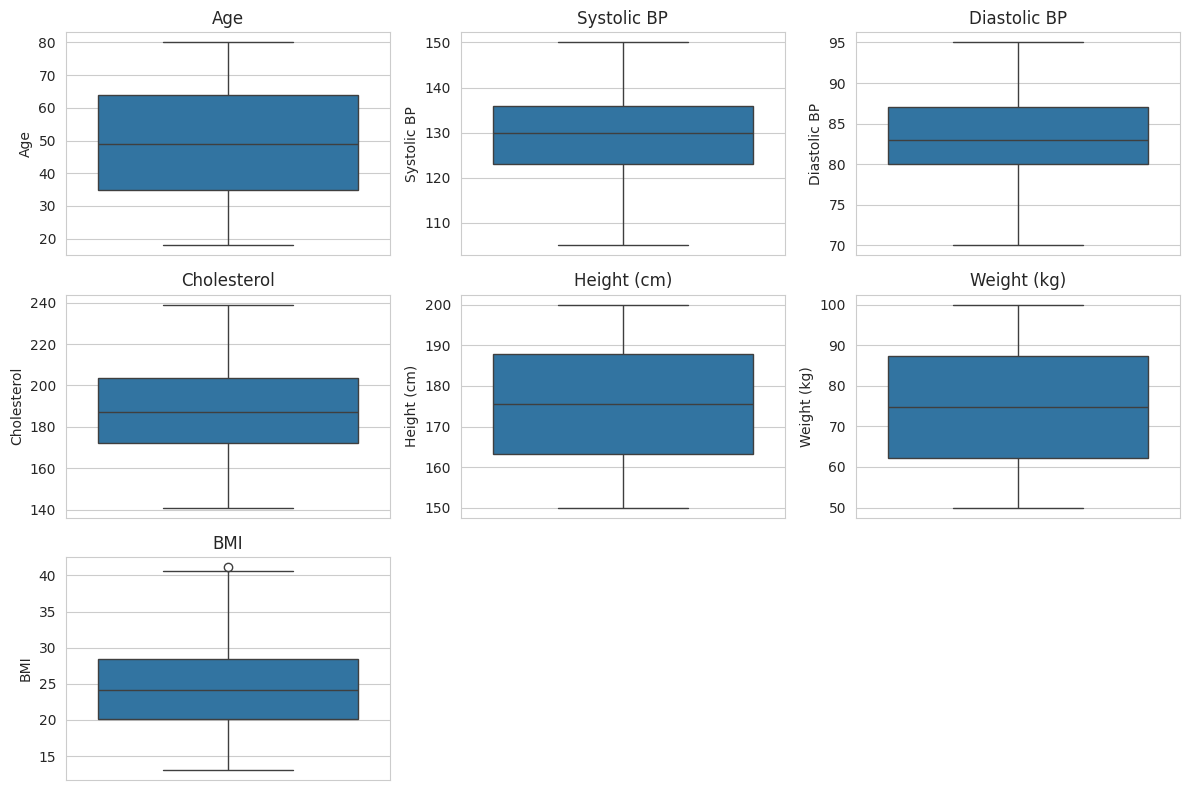

In [88]:
#box plot
num_features =  df[['Age', 'Systolic BP', 'Diastolic BP', 'Cholesterol', 'Height (cm)',
        'Weight (kg)', 'BMI']]

# Creating boxplots for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features.columns, 1):  # Use num_features.columns
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

The boxplots display the distribution pattern of different attributes. The Interquartile Range (IQR) technique was applied to handle outliers in both diastolic blood pressure and body mass index (BMI) data for quality assurance purposes. The distributions of other characteristics such as age as well as systolic blood pressure and cholesterol appear to be normal. Some extreme numbers persist in BMI measurements as well as in diastolic blood pressure observations. A combination of these discoveries guides the refinement phase of the dataset before model development for classification purposes.

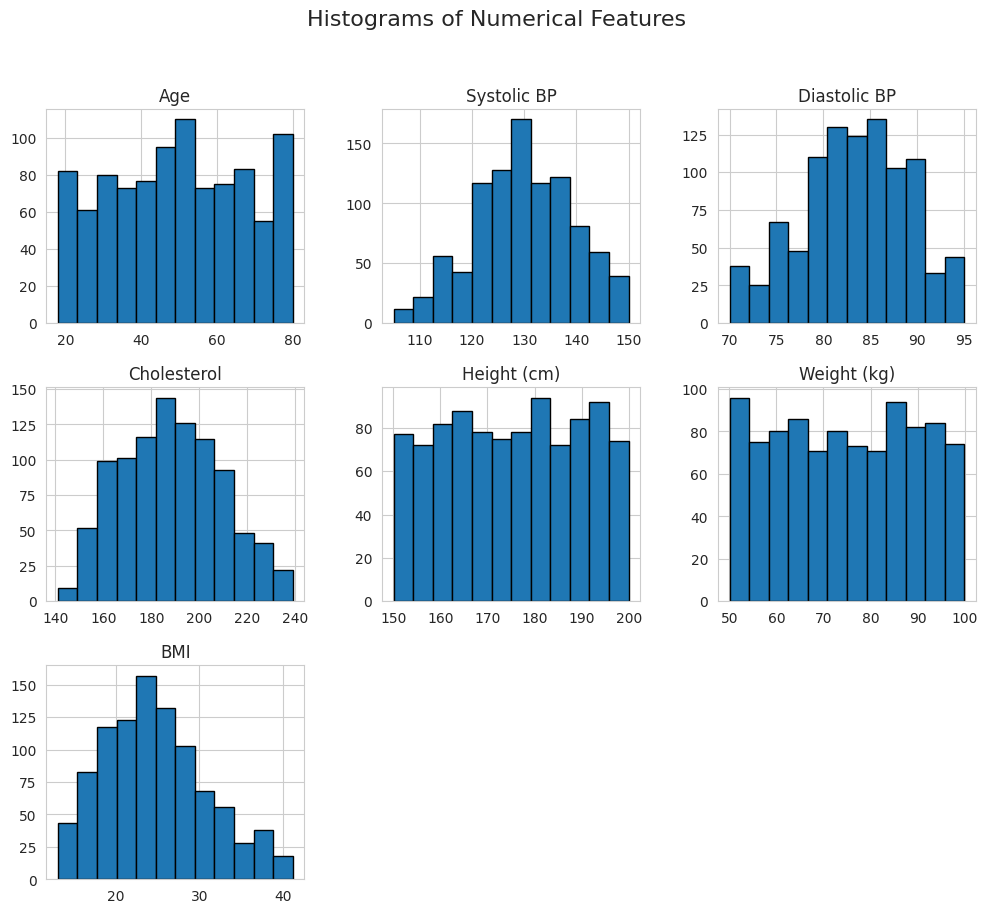

In [89]:
# Set the style for the plots
sns.set_style("whitegrid")

df.hist(figsize=(12, 10), bins=12, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

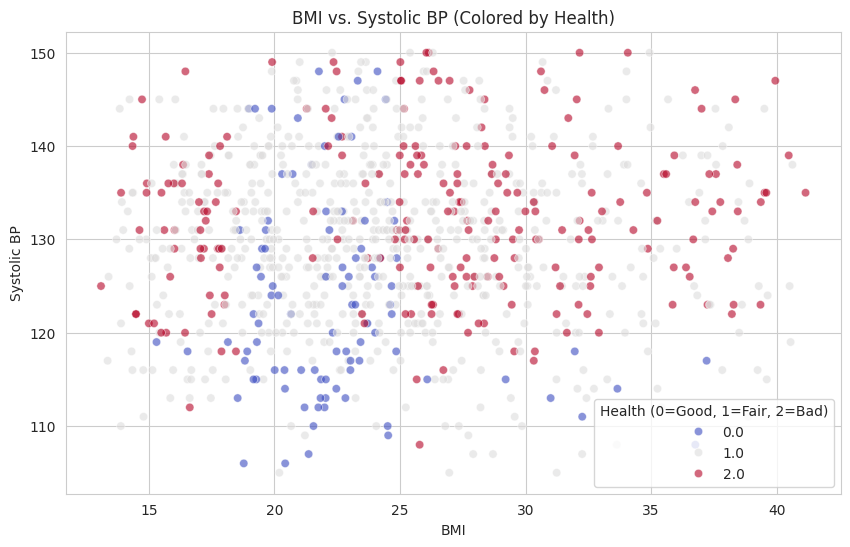

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["BMI"], y=df["Systolic BP"], hue=df["Health"], palette="coolwarm", alpha=0.6)
plt.xlabel("BMI")
plt.ylabel("Systolic BP")
plt.title("BMI vs. Systolic BP (Colored by Health)")
plt.legend(title="Health (0=Good, 1=Fair, 2=Bad)")
plt.show()

In [91]:
c = df.select_dtypes(include=["number"]).corr()
c

,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI
Age,1.000000,0.645534,0.617192,0.402910,-0.045259,0.024935,0.048651
Systolic BP,0.645534,1.000000,0.589070,0.360384,-0.039966,0.001428,0.029156
Diastolic BP,0.617192,0.589070,1.000000,0.399201,-0.040185,0.007737,0.028848
Cholesterol,0.402910,0.360384,0.399201,1.000000,-0.011924,0.020307,0.019887
Height (cm),-0.045259,-0.039966,-0.040185,-0.011924,1.000000,0.089686,-0.599415
Weight (kg),0.024935,0.001428,0.007737,0.020307,0.089686,1.000000,0.730761
BMI,0.048651,0.029156,0.028848,0.019887,-0.599415,0.730761,1.000000


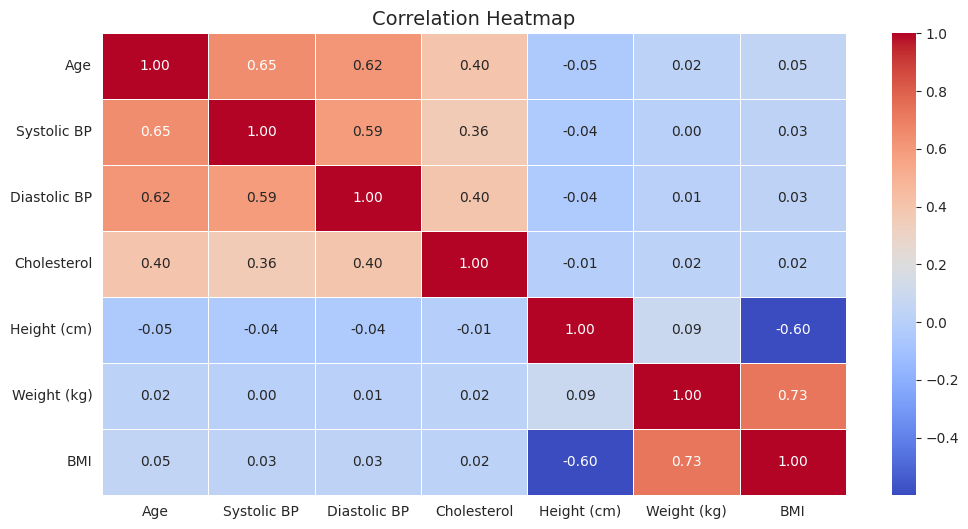

In [92]:
plt.figure(figsize=(12,6))
sns.heatmap(c, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Fix colormap
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [93]:
#saving clean dataset in drive
df.to_csv("/content/drive/MyDrive/enhanced_health_data_cleaned_data.csv", index=False)

In [129]:
#opening the clean data set
df = pd.read_csv("/content/drive/MyDrive/enhanced_health_data_cleaned_data.csv")

In [130]:
health_categories = [['Good', 'Fair', 'Bad']]
df['Health'] = df['Health'].astype(str)
encoder = OrdinalEncoder(categories=health_categories)
df[['Health']] = encoder.fit_transform(df[['Health']])
e = LabelEncoder()
df['Smoker'] = e.fit_transform(df['Smoker'])
df['Diabetes']=e.fit_transform(df['Diabetes'])
X = df[['Age', 'Systolic BP', 'Diastolic BP', 'Cholesterol', 'Height (cm)',
        'Weight (kg)', 'BMI']]
y=df['Health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build a model

In [141]:
import numpy as np
def softmax(z):
    """
    Compute the softmax of a 2D numpy array along the specified axis.

    Parameters:
    z (numpy.ndarray): Input array of shape (m, n) where m is the number of samples
                        and n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probabilities of the same shape as input (m, n), where
                   each row sums to 1 and represents the probability distribution
                   over classes for a sample.

    Notes:
    - Applies a normalization trick to prevent numerical instability by subtracting
      the max value in each row before exponentiation.
    """
    # Normalize input to prevent numerical instability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [142]:
def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.

    Parameters:
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,).

    Returns:
    float: Cross-entropy loss for the observation.
    """
    return -np.sum(y_true * np.log(y_pred + 1e-10))  # Add epsilon to prevent log(0)


In [143]:
def cost_softmax(X, y, W, b):
    """
    Compute the average cross-entropy cost over all samples.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: Average cross-entropy cost over all samples.
    """
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n


In [144]:
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b


In [145]:
# Gradient Descent
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.
    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
    return W, b, cost_history


In [146]:
# Prediction Function
def predict_softmax(X, W, b):
    """
    Predict the class labels for input data.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    Returns:
    numpy.ndarray: Predicted class labels of shape (n,).
    """
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)


In [147]:
def evaluate_classification(y_true, y_pred):
    """
    Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.
    Parameters:
    y_true (numpy.ndarray): True class labels of shape (n,).
    y_pred (numpy.ndarray): Predicted class labels of shape (n,).
    Returns:
    tuple: Confusion matrix, precision, recall, and F1-score.
    """
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

    # Calculate the confusion matrix and metrics
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)

    # Print the results
    print("Confusion Matrix:")
    print(cm)
    print(f"Precision (Weighted): {precision:.4f}")
    print(f"Recall (Weighted): {recall:.4f}")
    print(f"F1-score (Weighted): {f1:.4f}")

    return cm, precision, recall, f1

# Example usage
y_true = np.array([0, 1, 2, 2, 0])
y_pred = np.array([0, 2, 2, 1, 0])

# Call the function and print the results
evaluate_classification(y_true, y_pred)


Confusion Matrix:
[[2 0 0]
 [0 0 1]
 [0 1 1]]
Precision (Weighted): 0.6000
Recall (Weighted): 0.6000
F1-score (Weighted): 0.6000


(array([[2, 0, 0],
        [0, 0, 1],
        [0, 1, 1]]),
 0.6,
 0.6,
 0.6)

In [148]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris # Importing the load_iris function

iris = load_iris() # Loading the Iris dataset
X = iris.data # Creates a Feature Matrix
y = iris.target # Creates a Target Vector
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

3.Build a Primary Model

In [139]:
# Model 1 LogisticRegression
log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train_scaled, y_train)

y_pred_sklearn = log_reg_sklearn.predict(X_test_scaled)

accuracy_log = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn Logistic Regression Accuracy: {accuracy_log:.4f}")
print(classification_report(y_test, y_pred_sklearn))


Scikit-Learn Logistic Regression Accuracy: 0.5412
              precision    recall  f1-score   support

           0       0.54      0.83      0.66       102
           1       0.54      0.22      0.31        92

    accuracy                           0.54       194
   macro avg       0.54      0.53      0.48       194
weighted avg       0.54      0.54      0.49       194



In [97]:
#model 2 RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.8711
              precision    recall  f1-score   support

         0.0       1.00      0.28      0.43        18
         1.0       0.84      1.00      0.91       131
         2.0       1.00      0.73      0.85        45

    accuracy                           0.87       194
   macro avg       0.95      0.67      0.73       194
weighted avg       0.89      0.87      0.85       194



In [140]:
#checking which model is better by comparing accuracy of Logistic Regression and Random Forest Classifier
if accuracy_log > accuracy_rf:
    print("Logistic Regression performed better based on accuracy.")
else:
    print("Random Forest performed better based on accuracy.")

Random Forest performed better based on accuracy.


Hyper-parameter Optimization with Cross-Validation

In [99]:
# Define the model
log_reg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver methods
    'max_iter': [100, 200, 500]  # Number of iterations
}

# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best hyperparameters Parameters Logistic Regression:", grid_search.best_params_)


Best hyperparameters Parameters Logistic Regression: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}


In [100]:
from sklearn.model_selection import RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 500, 1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=5, cv=3, scoring='accuracy', random_state=42)  # Reduced iterations and folds
rf_random.fit(X_train_scaled, y_train)
print("Best hyperparameters for Random Forest:", rf_random.best_params_)

Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


5. Feature Selection

In [131]:
from sklearn.feature_selection import SelectKBest, f_classif
k = 3 # Selecting top 2 features (adjust based on your needs)
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Systolic BP', 'Diastolic BP', 'Cholesterol'], dtype='object')


In [132]:
#Logistic Regression final model
selected_features = ['Systolic BP', 'Diastolic BP', 'Cholesterol']
X = df[selected_features]
y = df['Diabetes']


In [133]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [134]:
# Train Logistic Regression Model with Best Parameters
log_reg = LogisticRegression(C=1, max_iter=100, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)


# Evaluate Model
accuracy_final_log = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy_final_log:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5412

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.83      0.66       102
           1       0.54      0.22      0.31        92

    accuracy                           0.54       194
   macro avg       0.54      0.53      0.48       194
weighted avg       0.54      0.54      0.49       194



In [135]:
rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=20,
    random_state=42
)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)


# Evaluate Model
accuracy_final_ran = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy_final_ran:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5773

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58       102
           1       0.55      0.60      0.57        92

    accuracy                           0.58       194
   macro avg       0.58      0.58      0.58       194
weighted avg       0.58      0.58      0.58       194



In [136]:
#Comparing accuracy of the final model of Random Forest Classifier with the inital one.
if accuracy_final_ran > accuracy_rf:
    print(f"Final Random Forest model is better\n"
          f"Initial Accuracy: {accuracy_rf:.4f}\n"
          f"Final Accuracy: {accuracy_final_ran:.4f}\n"
          f"Improvement: {accuracy_final_ran - accuracy_rf:.4f}")
elif accuracy_final_ran < accuracy_rf:
    print(f"Initial Random Forest model performed better."
          f"Initial Accuracy: {accuracy_rf:.4f}\n"
          f"Final Accuracy: {accuracy_final_ran:.4f}\n"
          f"Drop in Performance: {accuracy_rf - accuracy_final_ran:.4f}")
else:
    print(f"Both models performed the same!\n"
          f"Accuracy: {accuracy_rf:.4f}")


Initial Random Forest model performed better.Initial Accuracy: 0.8711
Final Accuracy: 0.5773
Drop in Performance: 0.2938


In [137]:
#Comparing accuracy of the final model of Logistic Regression with the inital one.
if accuracy_final_log > accuracy_log:
    print(f"Final Logistic Regression model is better\n"
          f"Initial Accuracy: {accuracy_log:.4f}\n"
          f"Final Accuracy: {accuracy_final_log:.4f}\n"
          f"Improvement: {accuracy_final_log - accuracy_log:.4f}")
elif accuracy_final_log < accuracy_log:
    print(f"Initial Logistic Regression model performed better.\n"
          f"Initial Accuracy: {accuracy_log:.4f}\n"
          f"Final Accuracy: {accuracy_final_log:.4f}\n"
          f"Drop in Performance: {accuracy_log - accuracy_final_log:.4f}")
else:
    print(f"Both models performed same\n"
          f"Accuracy: {accuracy_log:.4f}")


Initial Logistic Regression model performed better.
Initial Accuracy: 0.7938
Final Accuracy: 0.5412
Drop in Performance: 0.2526
